In [1]:
import tensorflow as tf

In [2]:
!nvidia-smi

NVIDIA-SMI has failed because you do not have suffient permissions. Please try running as an administrator.


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tqdm import tqdm

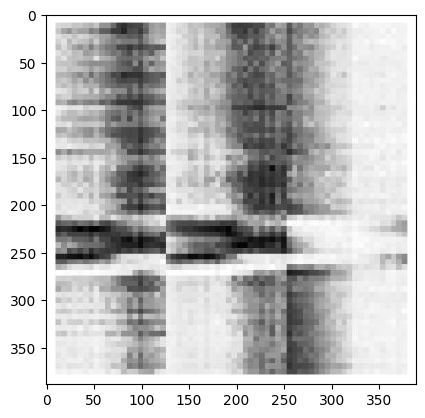

In [5]:
# References: https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/
DATADIR = r"C:\Users\New Asus\Documents\FIT4701_2025_Sem1\training_img_dataset\side_dataset\side_vision"

CATEGORIES = ["clap", "jump", "nopeople", "punching", "pushpull", "rubhand", "squatting", "standing", "twist", "waving"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        break  # we just want one for now so break
    break  #...and one more!
 

In [6]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1210/1210 [00:01<00:00, 736.97it/s]

12099


In [8]:
import random

random.shuffle(training_data)

In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)  # Convert y to NumPy array

In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [12]:
X = X/255.0
y = to_categorical(y, num_classes=10)

In [13]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
cnn.compile(  loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
cnn.fit(X, y, epochs=10, validation_split=0.25)

Epoch 1/10
284/284 [==============================] - 21s 68ms/step - loss: 1.7069 - accuracy: 0.3822 - val_loss: 1.3291 - val_accuracy: 0.5104
Epoch 2/10
284/284 [==============================] - 18s 64ms/step - loss: 1.1587 - accuracy: 0.5944 - val_loss: 1.0742 - val_accuracy: 0.6162
Epoch 3/10
284/284 [==============================] - 18s 65ms/step - loss: 0.9359 - accuracy: 0.6781 - val_loss: 1.0066 - val_accuracy: 0.6380
Epoch 4/10
284/284 [==============================] - 21s 74ms/step - loss: 0.7871 - accuracy: 0.7315 - val_loss: 0.9380 - val_accuracy: 0.6810
Epoch 5/10
284/284 [==============================] - 19s 68ms/step - loss: 0.6681 - accuracy: 0.7722 - val_loss: 0.8895 - val_accuracy: 0.6912
Epoch 6/10
284/284 [==============================] - 19s 68ms/step - loss: 0.5581 - accuracy: 0.8112 - val_loss: 0.9041 - val_accuracy: 0.6965
Epoch 7/10
284/284 [==============================] - 20s 70ms/step - loss: 0.4551 - accuracy: 0.8476 - val_loss: 0.8967 - val_accuracy: